In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
from pprint import pprint
import sqlite3
import yaml
import math
import re
from datetime import datetime
from datetime import timezone
import maya
from collections import Counter
from glob import glob
from ast import literal_eval
import sys
import json
import cProfile
import time
from collections import OrderedDict
from sklearn.preprocessing import StandardScaler
from scipy import spatial

try: # for pip >= 10
    from pip._internal.req import parse_requirements
except ImportError: # for pip <= 9.0.3
    from pip.req import parse_requirements

from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

import networkx as nx
import networkx.algorithms.community as nxcom

import bokeh.io
from bokeh.io import output_file, show
from bokeh.resources import INLINE
from bokeh.models import (BoxSelectTool, Circle, EdgesAndLinkedNodes, HoverTool,
                          MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool,
                         BoxZoomTool, ResetTool, OpenURL, CustomJS, Column, SaveTool)
from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_notebook
from bokeh.models.graphs import from_networkx
from bokeh.models import TextInput, Button

from scipy.spatial.distance import cosine

#%matplotlib inline

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

In [24]:
f = open("Simulation_Data.txt").read()[1:].split("\n")
f

["['naive', 'lru_i', 'lru_c', 'land']",
 'tests',
 '[-1, -1, -1]',
 'False',
 'False',
 'False',
 'False',
 'False',
 '[181140440.25199997, 2197705.236, 1513661.5999999999, 60538.53200000001]',
 '[27338235.66300732, 266169.6581150291, 179713.0966797591, 3936.182066564301]',
 '[0, 0.9935051410444276, 0.9961277330477403, 0.9999334492630738]',
 '[0, 2197705.235999999, 1513661.599999999, 60538.532]',
 "['naive', 'lru_i', 'lru_c', 'land']",
 '[870.9629023075104, 361.1455900669098, 232.6636745929718, 375.2540452480316]',
 '',
 '',
 "['naive', 'lru_i', 'lru_c', 'land']",
 'tests',
 '[-1, -1, -1]',
 'True',
 'False',
 'False',
 'False',
 'False',
 '[181140440.25199997, 23165971.755999997, 1513661.5999999999, 110209.35999999999]',
 '[27338235.66300732, 3060354.483470394, 179713.0966797591, 6374.314102461799]',
 '[0, 0.9327307615992388, 0.9961277330477403, 0.9999334492630738]',
 '[0, 23165971.755998872, 1513661.599999999, 60538.532]',
 "['naive', 'lru_i', 'lru_c', 'land']",
 '[860.2297012805939,

In [100]:
f = open("Simulation_Data.txt").read()[1:].split("\n")
df = pd.DataFrame(columns=['type', 'data', 'container size', 'cache size constraint', 'capacity', 'version', 
                           'alpha', 'xtra_vers', 'xtra_stat1', 'xtra_dynamic', 'total_size', 
                           'total_time', 'hitrate', 'cache_size', 'names', 'runtime'])
total_index = 0
total_limit = len(f)

while True:
    i = 0
    l1, l2, l3, l4 = [], [], [], []

    num_type = len(literal_eval(f[0]))
    while i < 14:

        # Constraints get a special case
        if i == 2:
            constraints = literal_eval(f[i])
            for j in np.arange(3):
                val = constraints[j]
                l1.append(val)
                l2.append(val)
                l3.append(val)
                l4.append(val)
        # List format
        elif f[i][0] == '[':
            entry = literal_eval(f[i])

            l1.append(entry[0])
            if (num_type >= 2):
                l2.append(entry[1])
                if (num_type >= 3):
                    l3.append(entry[2])
                    if (num_type >= 4):
                        l4.append(entry[3])

        # Non-list format
        else:
            val = f[i]
            try:
                val = float(val)
            except:
                pass
            l1.append(val)
            l2.append(val)
            l3.append(val)
            l4.append(val)

        i += 1
        total_index += 1

    s1 = pd.Series(l1, index = df.columns)
    df = df.append(s1, ignore_index=True)
    if (num_type >= 2):
        s2 = pd.Series(l2, index = df.columns)
        df = df.append(s2, ignore_index=True)
        if (num_type >= 3):
            s3 = pd.Series(l3, index = df.columns)
            df = df.append(s3, ignore_index=True)
            if (num_type >= 4):
                s4 = pd.Series(l4, index = df.columns)
                df = df.append(s4, ignore_index=True)
                
    if (total_index == total_limit):
        break
    
    while (f[i] == ''):
        i += 1
        total_index += 1
        if (total_index == total_limit):
            break
    
    if (total_index == total_limit):
        break
    
    f = f[i:]

In [101]:
df.head(50)

,type,data,container size,cache size constraint,capacity,version,alpha,xtra_vers,xtra_stat1,xtra_dynamic,total_size,total_time,hitrate,cache_size,names,runtime
0,naive,tests,-1,-1,-1,False,False,False,False,False,1.811404e+08,2.733824e+07,0,0,naive,870.962902
1,lru_i,tests,-1,-1,-1,False,False,False,False,False,2.197705e+06,2.661697e+05,0.993505,2197705.236,lru_i,361.145590
2,lru_c,tests,-1,-1,-1,False,False,False,False,False,1.513662e+06,1.797131e+05,0.996128,1513661.6,lru_c,232.663675
3,land,tests,-1,-1,-1,False,False,False,False,False,6.053853e+04,3.936182e+03,0.999933,60538.532,land,375.254045
4,naive,tests,-1,-1,-1,True,False,False,False,False,1.811404e+08,2.733824e+07,0,0,naive,860.229701
5,lru_i,tests,-1,-1,-1,True,False,False,False,False,2.316597e+07,3.060354e+06,0.932731,23165971.755999,lru_i,1484.935260
6,lru_c,tests,-1,-1,-1,True,False,False,False,False,1.513662e+06,1.797131e+05,0.996128,1513661.6,lru_c,543.056761
7,land,tests,-1,-1,-1,True,False,False,False,False,1.102094e+05,6.374314e+03,0.999933,60538.532,land,932.050621
8,naive,tests,-1,-1,7,True,0.7,False,False,False,1.811404e+08,2.733824e+07,0,0,naive,721.554437
9,lru_i,tests,-1,-1,7,True,0.7,False,False,False,9.939823e+07,1.448471e+07,0.580974,1079.292,lru_i,456.041594


just an example for now

In [112]:
land_stat_df = df[(df["xtra_stat1"].apply(lambda x: type(x)) == float) & (df["type"] == "land")]
land_stat_df

,type,data,container size,cache size constraint,capacity,version,alpha,xtra_vers,xtra_stat1,xtra_dynamic,total_size,total_time,hitrate,cache_size,names,runtime
34,land,tests,-1,-1,10,True,0.7,False,300.0,False,3.245226e+07,3.126686e+06,0.867269,5261.516,land,6456.865885
37,land,tests,-1,-1,10,True,0.7,False,400.0,False,3.233708e+07,3.127105e+06,0.866709,7917.752,land,6515.476583
40,land,tests,-1,-1,10,True,0.7,False,500.0,False,3.177770e+07,3.100263e+06,0.865556,6424.04,land,6547.501741
43,land,tests,-1,-1,10,True,0.7,False,600.0,False,3.162128e+07,3.088530e+06,0.865393,5370.24,land,6534.135065
46,land,tests,-1,-1,10,True,0.7,False,700.0,False,3.134152e+07,3.051755e+06,0.901194,6559.624,land,5145.582836


<AxesSubplot:xlabel='total_size', ylabel='total_time'>

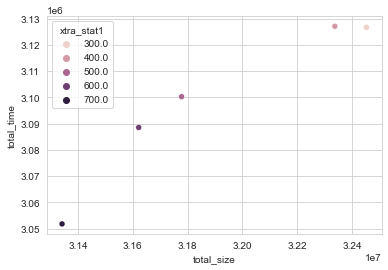

In [113]:
sns.scatterplot(x="total_size", y="total_time", hue="xtra_stat1", data=land_stat_df)

In [114]:
lruc_dynamic_df = df[(df["xtra_dynamic"].apply(lambda x: type(x)) == float) & (df["type"] == "land")]
lruc_dynamic_df

,type,data,container size,cache size constraint,capacity,version,alpha,xtra_vers,xtra_stat1,xtra_dynamic,total_size,total_time,hitrate,cache_size,names,runtime
49,land,tests,-1,-1,10,True,0.7,False,False,0.5,1.459686e+08,2.294074e+07,0.370949,0.0,land,3562.792023
52,land,tests,-1,-1,10,True,0.7,False,False,0.75,1.710444e+08,2.570568e+07,0.183591,25.0,land,4152.112312
55,land,tests,-1,-1,10,True,0.7,False,False,1.0,1.811402e+08,2.733821e+07,0.001824,0,land,2196.969493
58,land,tests,-1,-1,10,True,0.7,False,False,1.25,1.811404e+08,2.733824e+07,0.001822,0,land,2181.100989
61,land,tests,-1,-1,10,True,0.7,False,False,1.5,1.811404e+08,2.733824e+07,0.001822,0,land,2090.005492


<AxesSubplot:xlabel='total_size', ylabel='total_time'>

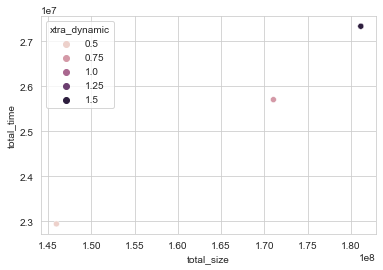

In [115]:
sns.scatterplot(x="total_size", y="total_time", hue="xtra_dynamic", data=lruc_dynamic_df)